# Logistic Regression Breast Cancer Case study

In [2]:
# Import libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from google.colab import files
uploaded = files.upload()


Saving breast_cancer.csv to breast_cancer.csv


In [3]:
dts = pd.read_csv('breast_cancer.csv')
print("Dataset Info:")
print(dts.info())
print("\nDataset Description:")
print(dts.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB
None

Dataset Description:
       Sample code number  Clump Thickness  Uniformity of Cell Size  \
count        6.

In [4]:
X = dts[['Clump Thickness', 'Uniformity of Cell Size']].values
y = dts['Class'].values  # Target klasifikasi ada pada kolom 'Class'
y = np.reshape(y, (-1,1))

## Splitting dataset into training and test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

## Feature Scalling

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training the logistic regression model on Training set

In [9]:
warnings.filterwarnings('ignore')
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting test set result

In [12]:
y_pred = clf.predict(X_test)
print(y_pred)

[2 2 4 4 2 2 2 4 2 2 4 2 4 2 2 2 4 4 4 2 2 2 2 2 4 4 2 2 2 4 2 4 4 2 2 2 4
 4 2 4 2 2 2 2 2 2 2 4 2 2 4 2 4 2 2 2 4 4 2 4 2 2 2 2 2 2 2 2 4 4 2 2 2 2
 2 2 4 2 2 2 4 2 4 2 2 4 2 2 4 2 4 2 4 2 2 2 4 4 4 2 2 2 4 4 2 2 4 4 2 2 4
 2 2 4 2 2 2 2 2 2 2 4 2 2 4 4 2 4 2 4 2 2 4 2 2 4 2 2 2 2 2 2 2 2 2 4 4 2
 2 2 4 2 2 2 2 2 4 4 2 4 4 4 4 2 4 2 2 2 2 2 2]


## computing Confusion Matrix and accuracy

In [13]:
cm = confusion_matrix(y_test, y_pred)
accu = accuracy_score(y_test, y_pred)
print("\nTest set Accuracy: {:.3f}%".format(accu * 100))


Test set Accuracy: 93.567%


## Plot Scatter Plot of Training Data Based On Selected Features

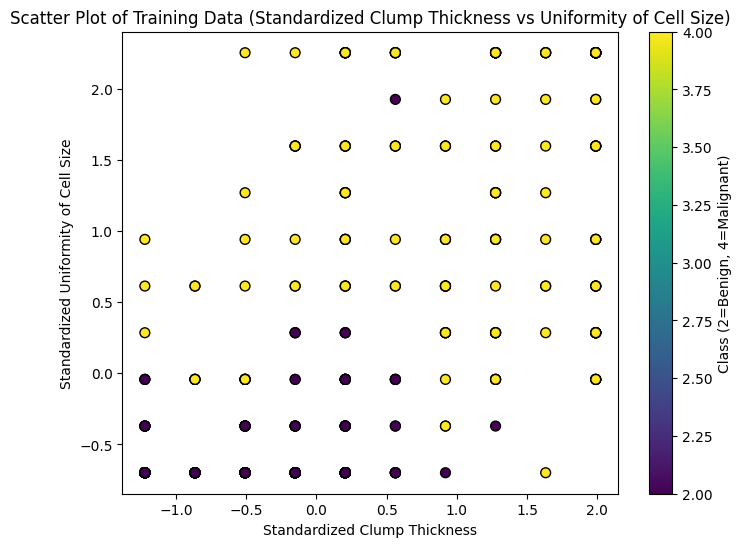

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title("Scatter Plot of Training Data (Standardized Clump Thickness vs Uniformity of Cell Size)")
plt.xlabel("Standardized Clump Thickness")
plt.ylabel("Standardized Uniformity of Cell Size")
plt.colorbar(label="Class (2=Benign, 4=Malignant)")
plt.show()

## Visualise Confusion Matrix as Heatmap

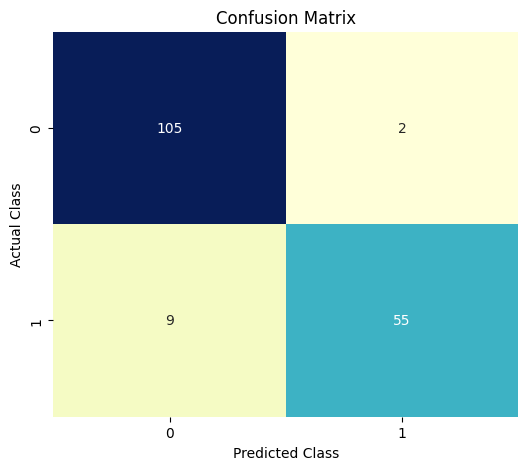

In [15]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

## ROC Curve

In [16]:
y_train = np.where(y_train == 2, 0, 1)
y_test = np.where(y_test == 2, 0, 1)

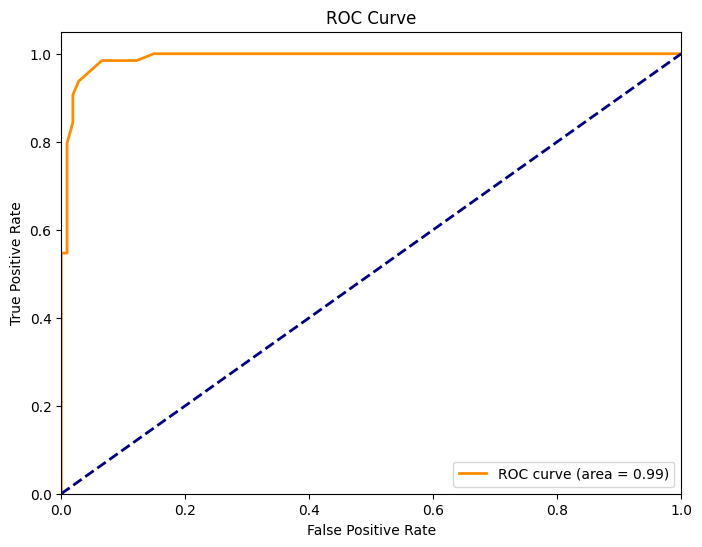

In [17]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Cross Validation for Accuracy

In [18]:
accuracies = cross_val_score(estimator=clf, cv=10, X=X_train, y=y_train)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard deviation: {:.2f} %".format(accuracies.std()*100))
warnings.filterwarnings('ignore')

Accuracy: 94.52 %
Standard deviation: 2.61 %


## Boxplot for Accuracy from Cross Validation

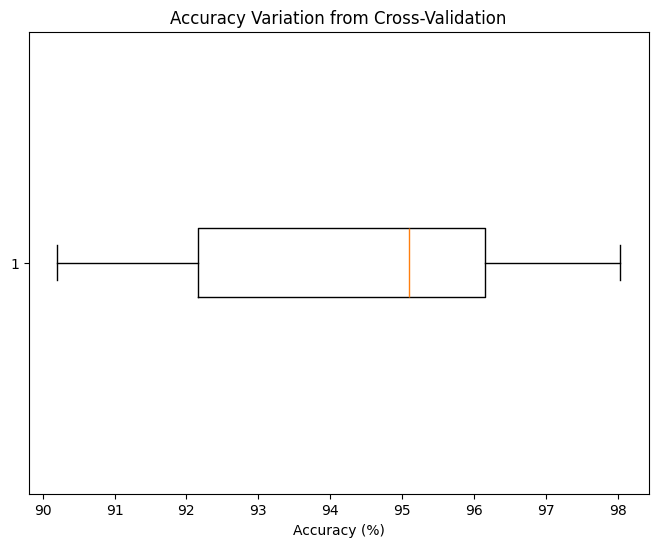

In [19]:
plt.figure(figsize=(8, 6))
plt.boxplot(accuracies * 100, vert=False)
plt.title("Accuracy Variation from Cross-Validation")
plt.xlabel("Accuracy (%)")
plt.show()

## Grid Search for Best Perameters

In [20]:
parameters = [{'penalty': ['l1', 'l2'], 'C':[0.25, 0.5, 0.75, 1], 'solver': ['liblinear', 'saga']}]
grid_search = GridSearchCV(estimator=clf,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.3f}%".format(best_accuracy * 100))
print("Best Parameters:", best_parameters)
warnings.filterwarnings('ignore')

Best Accuracy: 94.721%
Best Parameters: {'C': 0.25, 'penalty': 'l1', 'solver': 'liblinear'}
